### TensorflowLite 회귀모델

In [1]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전기생산금액
x =np.array([3.52,2.58,3.31,4.07,4.62,3.98,4.29, 4.83, 3.71, 4.61, 3.90,3.20])

# 전기소비량
y =np.array([2.48,2.27,2.47,2.77,2.98,3.05,3.18, 3.46, 3.03, 3.25, 2.67,2.53] )

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 439ms/step - loss: 4.8427
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 2.2003
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0121
Epoch 4/200
1/1 [==============================] - 0s 0s/step - loss: 0.4778
Epoch 5/200
1/1 [==============================] - 0s 0s/step - loss: 0.2375
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1295
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0590
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0448
Epoch 11/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 12/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0418
Epoch 13/200
1/1 [==============================] - 0s 7ms/st

In [4]:
model.evaluate(x,y)

1/1 [==============================] - 0s 159ms/step - loss: 0.0384


0.038423702120780945

In [5]:
model.predict([4]) # x=4 => y=2.9

1/1 [==============================] - 2s 2s/step


array([[2.905157]], dtype=float32)

In [6]:
slope=model.weights[0][0][0].numpy()

In [7]:
intercept=model.weights[1][0].numpy()

In [8]:
4*slope + intercept

2.9051571041345596

In [9]:
y2=slope*x +intercept

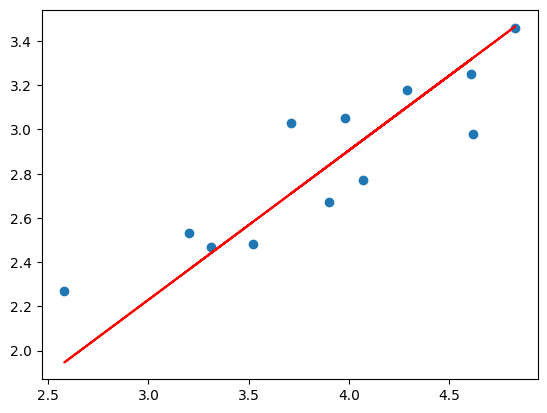

In [10]:
plt.scatter(x, y)
plt.plot(x, y2, c="red")
plt.show()

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('./reg_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\tjoeun\AppData\Local\Temp\tmpnf50abur\assets


INFO:tensorflow:Assets written to: C:\Users\tjoeun\AppData\Local\Temp\tmpnf50abur\assets
